<p align="center">
  <img src="https://entrackr.com/wp-content/uploads/2017/08/zomato-image.jpg"/>
</p>

**Zomato** is a restaurant search and discovery service founded in 2008 by Indian entrepreneurs Deepinder Goyal and Pankaj Chaddah. It currently operates in 23 countries. They've recently released this directory of all restaurants & eateries currently under its purview. 

The data contains the following columns - 

1. Restaurant ID - Unique identification assigned to each restaurant by Zomato. In itself, for this dataset, it does not serve any useful purpose. 
2. Restaurant Name - Name of the Restaurant
3. Country Code
4. City*
5. Address
6. Locality
7. Locality Verbose - Locality along with City info*
8. Latitude*
9. Longitude*
10. Cusinies - List of cusines served*
11. Average Cost of two (INR if consider data from India/Indian Cities)*
12. Currency 
13. Has Table Booking (boolean)
14. Has Online Delivery (boolean)
15. Is Delivering Now (boolean)
16. Switch to order menu (boolean)
17. Price range (levels)
18. Aggregate rating (avg of all votes received)*
19. Rating Color (Zomato's lingo)
20. Rating text (V.Good,Good,Avg,Poor)*
21. Votes

*Points of Interest

# Table of Contents

## 1. [Sneak Peak into the Data!](#section1)
## 2. [Countries in which Zomato Operates](#section2)
## 3. [Cusinies served in Zomato's Target Markets](#section3)
## 4. [Ratings Vs. Cost of Dining for Two](#section4)
## 5. [Delhi, NCR & its Neighbouring Areas](#section5)
## 6. [Breakfast & Coffee - Ratings & Locations](#section6)
## 7. [American Fast Food - Ratings & Locations](#section7)
## 8. [Ice Creams & Shakes - Ratings & Locations](#section8)
## 9. [Fine Dining at Top Restaurants](#section9)

### Loading Relevant Libraries

- Pandas: Reading & Manipulating Tabular Data
- Numpy: Numerical Operations in Python
- Matplotlib, Seaborn & PlotLy: Plotting

In [1]:
import os, gc, warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
#matplotlib.rc['font.size'] = 9.0
matplotlib.rc('font', size=20)
matplotlib.rc('axes', titlesize=20)
matplotlib.rc('axes', labelsize=20)
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('legend', fontsize=20)
matplotlib.rc('figure', titlesize=20)
import seaborn as sns
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.plotly as py
init_notebook_mode(connected=True)
from IPython.display import display
from IPython.core.display import HTML
%matplotlib inline

In [2]:
countryCode_toName = {
    1: "India",
    14: "Australia",
    30: "Brazil",
    37: "Canada",
    94: "Indonesia",
    148: "New Zealand",
    162: "Phillipines",
    166: "Qatar",
    184: "Singapore",
    189: "South Africa",
    191: "Sri Lanka",
    208: "Turkey",
    214: "UAE",
    215: "United Kingdom",
    216: "United States",
}

In [3]:
def number_of_cusines(temp):
    #print (temp)
    return len(temp.split())

<a id="section1"></a>
    
# Sneak Peak into the Dataset

In [4]:
data = pd.read_csv("data/zomato.csv", encoding = "ISO-8859-1")
data['Country'] = data['Country Code'].apply(lambda x: countryCode_toName[x])
data.sample(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
6900,309874,The Upper Crust,1,New Delhi,"Shop 4, Upper Ground Floor, Plot 4, Khasra 132...",Saket,"Saket, New Delhi",77.212343,28.519141,"Pizza, Fast Food",...,No,No,No,No,2,3.0,Orange,Average,15,India
3869,310982,Changezi Chicken,1,New Delhi,"G-1, Vardhman Royal Plaza, LSC, Deraval Nagar ...",Gujranwala Town,"Gujranwala Town, New Delhi",77.189808,28.701484,"North Indian, Mughlai",...,No,Yes,No,No,2,3.1,Orange,Average,42,India
4354,309844,Natural Ice Cream,1,New Delhi,"Ground Floor, JMD Kohinoor Mall, Masjid Moth, ...","JMD Kohinoor Mall, Greater Kailash","JMD Kohinoor Mall, Greater Kailash, New Delhi",77.238611,28.536744,Ice Cream,...,No,Yes,No,No,1,4.5,Dark Green,Excellent,665,India
2697,5294,Metro Fast Food,1,New Delhi,"Near Taxi Stand, Central Market, Ashok Vihar P...",Ashok Vihar Phase 1,"Ashok Vihar Phase 1, New Delhi",77.172734,28.693833,"Chinese, Fast Food",...,No,No,No,No,1,2.7,Orange,Average,17,India
5624,18472788,North East Castle,1,New Delhi,"Shop 7, Capital Court, Munirka, New Delhi",Munirka,"Munirka, New Delhi",77.175936,28.555002,Cafe,...,No,No,No,No,2,2.9,Orange,Average,4,India


<a id="section2"></a>

# Zomato's Presence across the Globe

In [5]:
labels = list(data.Country.value_counts().index)
values = list(data.Country.value_counts().values)

fig = {
    "data":[
        {
            "labels" : labels,
            "values" : values,
            "hoverinfo" : 'label+percent',
            "domain": {"x": [0, .9]},
            "hole" : 0.6,
            "type" : "pie",
            "rotation":120,
        },
    ],
    "layout": {
        "title" : "Zomato's Presence around the World",
        "annotations": [
            {
                "font": {"size":20},
                "showarrow": True,
                "text": "Countries",
                "x":0.2,
                "y":0.9,
            },
        ]
    }
}

iplot(fig)

### Quick Inferences - 

1. Zomato's largest market is in India itself, nobody even comes close. 
2. Analysing data from India should give us a pretty accurate representation of the entire data.
3. One important thing that might vary across different regions is the **types of Cusinies**. So it should be interesting to see how many cusinies are served throughout the world. 

<a id="section3"></a>

# Cusinies Served in Zomato's Target Markets

In [6]:
data.Cuisines.fillna("zero", inplace=True)
data['Number of Cusines Offered'] = data.Cuisines.apply(number_of_cusines)

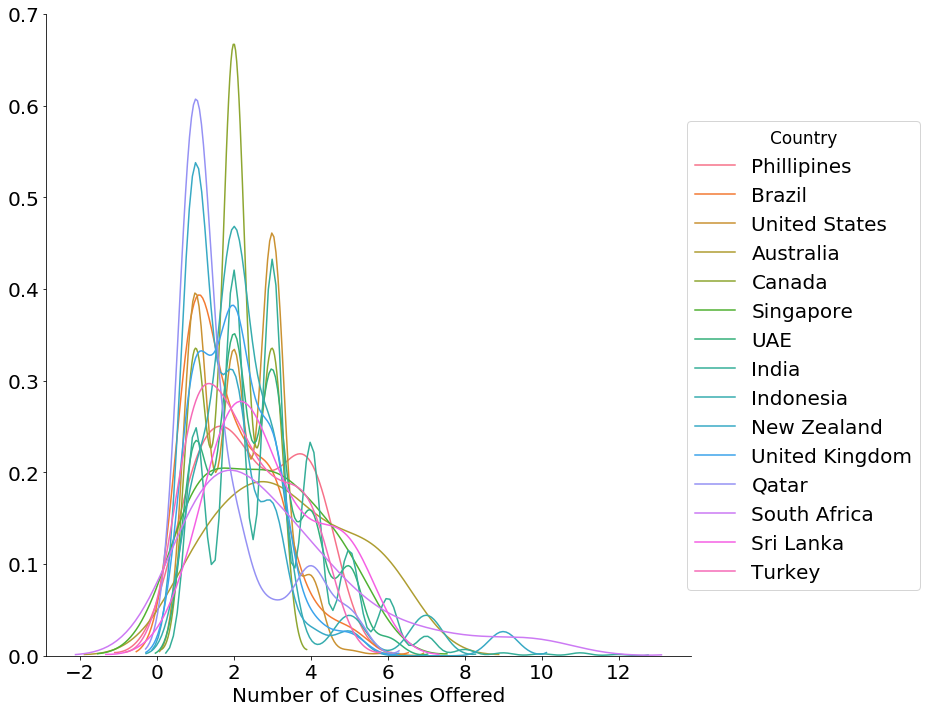

In [7]:
g = sns.FacetGrid(data, hue='Country', size=10)
g.map(sns.kdeplot, "Number of Cusines Offered")
g.add_legend()

### Quick Inferences - 

1. Most retaurants seem to offer 1-3 types of cusinies.  
2. Countries like the US, Australia predominantly have restaurants offering >3 cusinies. 

<a id="section4"></a>

# Are ratings affected by how cheap/expensive a restaurant is?

The following plot was created by aggrating the ratings & the **average cost of two** for eating at a particular place.

In [8]:
data_india = data.loc[data.Country == "India"]
data_india['Text'] = data_india['Restaurant Name'] + "<br>" + data_india['Locality Verbose']
data_india_rest = data_india[['Restaurant Name','Aggregate rating',
                              'Average Cost for two']].groupby('Restaurant Name').mean()

In [9]:
data = [
    go.Scatter(x = data_india_rest['Average Cost for two'],
              y = data_india_rest['Aggregate rating'],
               text = data_india['Text'],
              mode = "markers",
               marker = dict(opacity = 0.7,
                            size = 10,
                            color = data_india_rest['Aggregate rating'], #Set color equalivant to rating
                            colorscale= 'Viridis',
                            showscale=True,
                             maxdisplayed=2500,
                            ),
                hoverinfo="text+x+y",
              )
]
iplot(data)

### Quick Inference

As it seems, from a quick glance, there is **no** obseravable linear relationship. At almost every price point, there appears to be both **Good** and **Bad** restaurants. 

<a id="section5"></a>

# Analysing Data from Delhi & its Neighbouring Areas

Since most of Zomato's business is concentrated in & around **New Delhi, India**, so I'll be looking for places to eat around the following areas -- 

1. New Delhi (National Capital Region, India)
2. Gurgaon
3. Noida
4. Faridabad

In [10]:
ncr_data = data_india.loc[data_india.City.isin(['New Delhi','Gurgaon','Noida','Faridabad'])]

In [11]:
x_ax = ncr_data.City.value_counts().index
y_ax = ncr_data.City.value_counts().values

data = [
    go.Bar(x = x_ax,
          y = y_ax,
          text = y_ax,
          textposition='auto',
          marker = dict(color = 'rgb(80, 228, 188)',
                       line = dict(color='rgb(8, 48, 107)',
                                  width=1.5),
                       ),
          opacity=0.6,
        hoverinfo="none"
          )
]

layout = go.Layout(title = "Number of Restaurants Across Major Cities",
                   yaxis = dict(title = "Number of Restaurants/Eateries <br> (Associated with Zomato)"),
                   xaxis = dict(title="Cities",
                               titlefont=dict(size=30),),
                  )


fig = go.Figure(data=data, layout=layout)

iplot(fig)

The aforementioned **four cities** represent nearly 65% of the total data available in the dataset. Apart from the local restaurants, it'd be intersting to know where the **known-eateries** that are commonplace. The verticles across which these can be located are -

- **Breakfast**
- **American Fast Food**
- **Ice Creams, Shakes & Desserts**

In [584]:
types = {
    "Breakfast and Coffee" : ["Cafe Coffee Day", "Starbucks", "Barista", "Costa Coffee", "Chaayos", "Dunkin' Donuts"],
    "American": ["Domino's Pizza", "McDonald's", "Burger King", "Subway", "Dunkin' Donuts", "Pizza Hut"],
    "Ice Creams and Shakes": ["Keventers", "Giani", "Giani's", "Starbucks", "Baskin Robbins", "Nirula's Ice Cream"]
}
breakfast = ncr_data.loc[ncr_data['Restaurant Name'].isin(types['Breakfast and Coffee'])]
american = ncr_data.loc[ncr_data['Restaurant Name'].isin(types['American'])]
ice_cream = ncr_data.loc[ncr_data['Restaurant Name'].isin(types['Ice Creams and Shakes'])]

print ("Breakfast: ", breakfast.shape, "\nFast Food: ", american.shape, "\nIce Cream: ", ice_cream.shape)

Breakfast:  (178, 24) 
Fast Food:  (238, 24) 
Ice Cream:  (138, 24)


<a id="section6"></a>

# Breakfast & Coffee

Common places to have Breakfast & Coffee include **Starbucks**, **Barista** etc.

### Average Ratings of Common Coffee Shops

In [585]:
breakfast_rating = breakfast[['Restaurant Name',
                              'Aggregate rating']].groupby('Restaurant Name').mean().reset_index().sort_values('Aggregate rating', 
                                                                                                               ascending=False)
x_ax = breakfast_rating['Restaurant Name']
y_ax = breakfast_rating['Aggregate rating'].apply(lambda x: round(x,2))

data = [
    go.Bar(x = x_ax,
          y = y_ax,
          text = y_ax,
          textposition='auto',
          marker = dict(color = 'rgb(159, 202, 220)',
                       line = dict(color='rgb(8, 48, 107)',
                                  width=1.5),
                       ),
          opacity=0.6,
        hoverinfo="none"
          )
]

layout = go.Layout(title = "Average Ratings: Breakfast & Coffee",
                  yaxis = dict(title="Average Rating",
                              titlefont=dict(size=20)),
                   xaxis = dict(title="Cafe",
                               titlefont=dict(size=20),),
                  )


fig = go.Figure(data=data, layout=layout)

iplot(fig)

### Where to find some good Breakfast & Coffee?

**Using the Mapbox API via PlotLy.**

In [599]:
breakfast_locations = breakfast[['Restaurant Name','Locality Verbose','City',
                                'Longitude','Latitude','Average Cost for two','Aggregate rating',
                                'Rating text']].reset_index(drop=True)
breakfast_locations['Text'] = breakfast_locations['Restaurant Name'] + "<br>Rating: "+breakfast_locations['Rating text']+" ("+breakfast_locations['Aggregate rating'].astype(str)+")" + "<br>" + breakfast_locations['Locality Verbose']
#mapbox_access_token = #enter mapbox token here
#breakfast_locations.sample(5)

In [587]:
data = [
    go.Scattermapbox(lat= breakfast_locations.Latitude,
                    lon = breakfast_locations.Longitude,
                    text = breakfast_locations['Restaurant Name'],
                    opacity = 0.8,
                    marker = dict(symbol = "cafe",
                                  size = 10,
                                 color="rgb(8, 48, 107)",
                                 opacity = 0.9,), 
                    hovertext = breakfast_locations['Text'], 
                    hoverlabel = dict(font = dict(size=15),),
                    mode = "markers+text",
                     
                    )
]

layout = go.Layout(autosize=True,
                   title = "Breakfast & Coffee in Delhi/Gurgaon & Neighbouring Areas<br>(Associated with Zomato)",
                   hovermode='closest',
                  mapbox = dict(
                  accesstoken = mapbox_access_token,
                  center = dict(lat = 28.63,
                               lon = 77.21,),
                  pitch = 0,
                zoom = 10,
                  ),
    )
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="donut")

<a id="section7"></a>

**Need more Starbucks outlets in Delhi...**

# American Fast Food

### Assessing Average Ratings of American Fast Food Chains like McDonald's, Subway etc

In [593]:
lunch_rating = american[['Restaurant Name',
                              'Aggregate rating']].groupby('Restaurant Name').mean().reset_index().sort_values('Aggregate rating', 
                                                                                                               ascending=False)
x_ax = lunch_rating['Restaurant Name']
y_ax = lunch_rating['Aggregate rating'].apply(lambda x: round(x,2))

data = [
    go.Bar(x = x_ax,
          y = y_ax,
          text = y_ax,
          textposition='auto',
          marker = dict(color = 'rgb(202, 202, 220)',
                       line = dict(color='rgb(8, 48, 107)',
                                  width=1.5),
                       ),
          opacity=0.6,
        hoverinfo="none",
          )
]

layout = go.Layout(title = "Average Ratings: Lunch",
                  yaxis = dict(title="Average Rating",
                              titlefont=dict(size=20)),
                   xaxis = dict(title="Restaurant",
                               titlefont=dict(size=20),),
                  )


fig = go.Figure(data=data, layout=layout)

iplot(fig)

**Quite surprising to see Burger King rated over McDonald's, or maybe it's just a personal bias!**

### Let's find some classic American Sandwiches

In [594]:
lunch_locations = american[['Restaurant Name','Locality Verbose','City',
                                'Longitude','Latitude','Average Cost for two','Aggregate rating',
                                'Rating text']].reset_index(drop=True)
lunch_locations['Text'] = lunch_locations['Restaurant Name'] + "<br>Rating: "+lunch_locations['Rating text']+" ("+lunch_locations['Aggregate rating'].astype(str)+")" + "<br>" + lunch_locations['Locality Verbose']

In [596]:
data = [
    go.Scattermapbox(lat= lunch_locations.Latitude,
                    lon = lunch_locations.Longitude,
                    text = lunch_locations['Restaurant Name'],
                    opacity = 0.8,
                    marker = dict(symbol = "restaurant",
                                  size = 10,
                                 color="rgb(8, 48, 107)", #does not work if the symbol isn't a circle
                                 opacity = 0.9,), 
                    hovertext = lunch_locations['Text'], 
                    hoverlabel = dict(font = dict(size=15),),
                    mode = "markers+text",
                     
                    )
]

layout = go.Layout(autosize=True,
                   title = "American Fast Food in Delhi/Gurgaon & Neighbouring Areas<br>(Associated with Zomato)",
                   hovermode='closest',
                  mapbox = dict(
                  accesstoken = mapbox_access_token,
                  center = dict(lat = 28.63,
                               lon = 77.21,),
                  pitch = 0,
                zoom = 10,
                  ),
    )
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="plot from API (18)")

<a id="section8"></a>

# Down for some Ice Creams & Shakes?

Though I'm not sure why **Giani's** is rated under 3, it clearly deserves more.

In [429]:
des_rating = ice_cream[['Restaurant Name',
                              'Aggregate rating']].groupby('Restaurant Name').mean().reset_index().sort_values('Aggregate rating', 
                                                                                                               ascending=False)
x_ax = des_rating['Restaurant Name']
y_ax = des_rating['Aggregate rating'].apply(lambda x: round(x,2))

data = [
    go.Bar(x = x_ax,
          y = y_ax,
          text = y_ax,
          textposition='auto',
          marker = dict(color = 'rgb(0, 202, 220)',
                       line = dict(color='rgb(8, 48, 107)',
                                  width=1.5),
                       ),
          opacity=0.6,
        hoverinfo="none",
          )
]

layout = go.Layout(title = "Average Ratings: Ice Cream & Shakes",
                  yaxis = dict(title="Average Rating",
                              titlefont=dict(size=20)),
                   xaxis = dict(title="Parlour",
                               titlefont=dict(size=20),),
                  )


fig = go.Figure(data=data, layout=layout)

iplot(fig)

### Locations of Popular Ice Cream Parlours in & around Delhi

In [430]:
des_locations = ice_cream[['Restaurant Name','Locality Verbose','City',
                                'Longitude','Latitude','Average Cost for two','Aggregate rating',
                                'Rating text']].reset_index(drop=True)
des_locations['Text'] = des_locations['Restaurant Name'] + "<br>Rating: "+des_locations['Rating text']+" ("+des_locations['Aggregate rating'].astype(str)+")" + "<br>" + des_locations['Locality Verbose']

In [597]:
data = [
    go.Scattermapbox(lat= des_locations.Latitude,
                    lon = des_locations.Longitude,
                    text = des_locations['Restaurant Name'],
                    opacity = 0.8,
                    marker = dict(symbol = "triangle",
                                  size = 10,
                                 color="rgb(8, 48, 107)", #does not work if the symbol isn't a circle
                                 opacity = 0.8,), 
                    hovertext = des_locations['Text'], 
                    hoverlabel = dict(font = dict(size=15),),
                    mode = "markers+text",
                     
                    )
]

layout = go.Layout(autosize=True,
                   title = "Ice Creams & Shakes Parlours in Delhi/Gurgaon & Neighbouring Areas<br>(Associated with Zomato)",
                   hovermode='closest',
                  mapbox = dict(
                  accesstoken = mapbox_access_token,
                  center = dict(lat = 28.63,
                               lon = 77.21,),
                  pitch = 0,
                zoom = 10,
                  ),
    )
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="plot from API (17)")

### Quick Inferences - 

A point of interest to see here would be that Zomato probably does NOT represent accurately the dessert scenario in the region as there are some popular kiosks operated ice cream vendors, most notably associated with **Mother Dairy Ice Creams, Kwality Walls etc** that are not represented here in the dataset.

<a id="section9"></a>

# Pre-booking a Lunch/Dinner? 

Here are some of the top restaurants in Delhi & it's neighbouring areas with the following characterstics - 

- **Have a rating > 4**
- **Have an option to pre-book a table**
- ### **Had at least 50 people rate it on Zomato**

In [46]:
top_fine_dine = ncr_data.loc[(ncr_data['Has Table booking'] == "Yes") & (ncr_data['Aggregate rating'] > 4) & (ncr_data['Votes'] > 50)].sort_values('Aggregate rating', ascending = False)
x_ax = top_fine_dine.head(15)['Restaurant Name']
y_ax = top_fine_dine.head(15)['Aggregate rating']

data = [
    go.Bar(x = x_ax,
          y = y_ax,
          text = top_fine_dine.head(15)['Cuisines'],
          textposition='auto',
          marker = dict(color = 'rgb(200, 234, 220)',
                       line = dict(color='rgb(8, 48, 107)',
                                  width=1.5),
                       ),
          opacity=0.6,
        #hoverinfo="text",
           hovertext=top_fine_dine.head(15)['Locality Verbose'],
           #orientation="h",
          )
]

layout = go.Layout(title = "Hover to display the locality of the restaurant",
                  yaxis = dict(title="Rating",
                              titlefont=dict(size=20)),
                   xaxis = dict(title="Restaurant",
                               titlefont=dict(size=20),),
                  )


fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [53]:
mapbox_access_token = "pk.eyJ1Ijoic3cxMjMiLCJhIjoiY2pqZDlja2NqMGt1MzNrcDJyc280NnhqbyJ9.Vr1RLSptPrL0rQak9VAJfw"
data = [
    go.Scattermapbox(lat= top_fine_dine.Latitude,
                    lon = top_fine_dine.Longitude,
                    text = top_fine_dine['Restaurant Name'],
                    opacity = 0.8,
                    marker = dict(symbol = "circle",
                                  size = 15,
                                 color="rgb(108, 48, 107)", #does not work if the symbol isn't a circle
                                 opacity = 0.6,), 
                    hovertext = top_fine_dine['Text'], 
                    hoverlabel = dict(font = dict(size=15),),
                    mode = "markers+text",
                     
                    )
]

layout = go.Layout(autosize=True,
                   title = "Top Restaurants with Fine Dining <br> (Hover to get more information)",
                   hovermode='closest',
                  mapbox = dict(
                  accesstoken = mapbox_access_token,
                  center = dict(lat = 28.63,
                               lon = 77.21,),
                  pitch = 0,
                zoom = 9,
                  ),
    )
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="plot from API (14)")

### That'd be all for now, I'll continue adding some more visuals as I explore this data. 
 
**Let me know what you guys think in the comments below!**